In [1]:
# Import libraries and dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Preprocessing dataset

In [2]:
# Loading data
df_Naplan = pd.read_csv("Naplan_results.csv")
df_Naplan.head(5)

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,PCTL05,PCTL20,PCTL80,PCTL95,TREND,TREND_VALUE,NOD_MEAN_PREV,NOD_NMS_PREV,NOD_MEAN_BASE,NOD_NMS_BASE
0,2008,3,Grammar and Punctuation,ACT,All,4366.0,419.6,6.2,83.1,93.6,...,276.5,350.1,490.2,551.7,Flat,434.8,NaN,NaN,NaN,NaN
1,2008,3,Grammar and Punctuation,ACT,Parental Education: Bachelor,167.0,445.2,NaN,79.7,95.8,...,308.7,381.3,513.0,565.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,Grammar and Punctuation,ACT,Parental Education: Certificate,72.0,396.1,NaN,91.0,90.0,...,240.9,319.4,476.6,546.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,3,Grammar and Punctuation,ACT,Parental Education: Diploma,52.0,401.4,NaN,69.1,96.9,...,283.7,342.1,456.3,519.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,3,Grammar and Punctuation,ACT,Parental Education: Not stated,4009.0,419.8,NaN,82.7,93.7,...,278.0,351.0,489.8,551.1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# student year grouped 'Calendar_Year' per year level
Group_Yr3 = df_Naplan.loc[df_Naplan['YEAR_LEVEL'] == 3].groupby('CALENDAR_YEAR')
Group_Yr5 = df_Naplan.loc[df_Naplan['YEAR_LEVEL'] == 5].groupby('CALENDAR_YEAR')
Group_Yr7 = df_Naplan.loc[df_Naplan['YEAR_LEVEL'] == 7].groupby('CALENDAR_YEAR')
Group_Yr9 = df_Naplan.loc[df_Naplan['YEAR_LEVEL'] == 9].groupby('CALENDAR_YEAR')

In [4]:
#Number of enrolled students each year
Number_Enrolled_yr3 = Group_Yr3["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr5 = Group_Yr5["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr7 = Group_Yr7["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr9 = Group_Yr9["ENROLLED_STUDENTS"].sum().astype(int)

In [5]:
# Number of enrolled students each year in a DF
Number_Enrolled = pd.DataFrame({
    "Year 3": Number_Enrolled_yr3,
    "Year 5": Number_Enrolled_yr5,
    "Year 7": Number_Enrolled_yr7,
    "Year 9": Number_Enrolled_yr9
})
Number_Enrolled

,Year 3,Year 5,Year 7,Year 9
CALENDAR_YEAR,,,,
2008,12904568,12899888,13101656,13310595
2009,12852012,13008524,12567912,13368684
2010,11981504,13181400,13132024,13327216
2011,16124170,16348760,16500750,15989430
2012,16545010,15235520,16699530,16618280
2013,16779220,16419910,16571010,16714030
2014,17597970,16816520,15419000,16886100
2015,18266200,16999360,16530180,16721670
2016,24967535,23745805,22616595,20793886


In [6]:
# Group the data by Domain and Year Level
Group_Yr3_Dom = df_Naplan[df_Naplan['YEAR_LEVEL'] == 3].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr5_Dom = df_Naplan[df_Naplan['YEAR_LEVEL'] == 5].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr7_Dom = df_Naplan[df_Naplan['YEAR_LEVEL'] == 7].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr9_Dom = df_Naplan[df_Naplan['YEAR_LEVEL'] == 9].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()

# Create a DataFrame to store the number of enrolled students each year
Number_by_Domain = pd.DataFrame({
    "Year 3": Group_Yr3_Dom,
    "Year 5": Group_Yr5_Dom,
    "Year 7": Group_Yr7_Dom,
    "Year 9": Group_Yr9_Dom
}).reset_index()

# Display the DataFrame
print(Number_by_Domain)

                    DOMAIN      Year 3      Year 5      Year 7      Year 9
0  Grammar and Punctuation  56773185.0  56044747.0  55015506.0  54426096.0
1                 Numeracy  56772754.0  56044509.0  55015505.0  54425772.0
2                  Reading  56773546.0  56045109.0  55016055.0  54426375.0
3                 Spelling  56773185.0  56044747.0  55015468.0  54426096.0
4                  Writing  47338102.0  46272842.0  45315677.0  44424917.0


In [7]:
# Group the data by Paricipation numbers and Year Level
Group_Yr3_PartNum = df_Naplan[df_Naplan['YEAR_LEVEL'] == 3].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr5_PartNum = df_Naplan[df_Naplan['YEAR_LEVEL'] == 5].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr7_PartNum = df_Naplan[df_Naplan['YEAR_LEVEL'] == 7].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr9_PartNum = df_Naplan[df_Naplan['YEAR_LEVEL'] == 9].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()

# Create a DataFrame to store the number of enrolled students each year
Number_by_PartNum = pd.DataFrame({
    "Year 3": Group_Yr3_PartNum,
    "Year 5": Group_Yr5_PartNum,
    "Year 7": Group_Yr7_PartNum,
    "Year 9": Group_Yr9_PartNum
}).reset_index()

# Display the DataFrame
print(Number_by_PartNum)

                    DOMAIN    Year 3    Year 5    Year 7    Year 9
0  Grammar and Punctuation  54052430  53622927  52131890  49758249
1                 Numeracy  53806822  53326763  51746967  49219982
2                  Reading  54082321  53661376  52152347  49712096
3                 Spelling  54052430  53622927  52131856  49758249
4                  Writing  44765636  44118058  42813757  40448300


In [8]:
# Calculate percentage difference function
def calculate_percentage_difference(enrolled, participation):
    return ((participation - enrolled) / enrolled) * 100

# Calculate percentage difference for each domain and year level
percentage_diff_3 = calculate_percentage_difference(Group_Yr3_Dom, Group_Yr3_PartNum)
percentage_diff_5 = calculate_percentage_difference(Group_Yr5_Dom, Group_Yr5_PartNum)
percentage_diff_7 = calculate_percentage_difference(Group_Yr7_Dom, Group_Yr7_PartNum)
percentage_diff_9 = calculate_percentage_difference(Group_Yr9_Dom, Group_Yr9_PartNum)

# Create a DataFrame to store the percentage differences
percentage_difference_data = pd.DataFrame({
    "Domain": Group_Yr3_Dom.index,
    "Year 3": percentage_diff_3.values,
    "Year 5": percentage_diff_5.values,
    "Year 7": percentage_diff_7.values,
    "Year 9": percentage_diff_9.values
})

# Display the DataFrame
print(percentage_difference_data)


                    Domain    Year 3    Year 5    Year 7    Year 9
0  Grammar and Punctuation -4.792324 -4.321226 -5.241460 -8.576487
1                 Numeracy -5.224217 -4.849264 -5.941122 -9.564936
2                  Reading -4.740280 -4.253240 -5.205222 -8.661755
3                 Spelling -4.792324 -4.321226 -5.241457 -8.576487
4                  Writing -5.434240 -4.656693 -5.521092 -8.951321


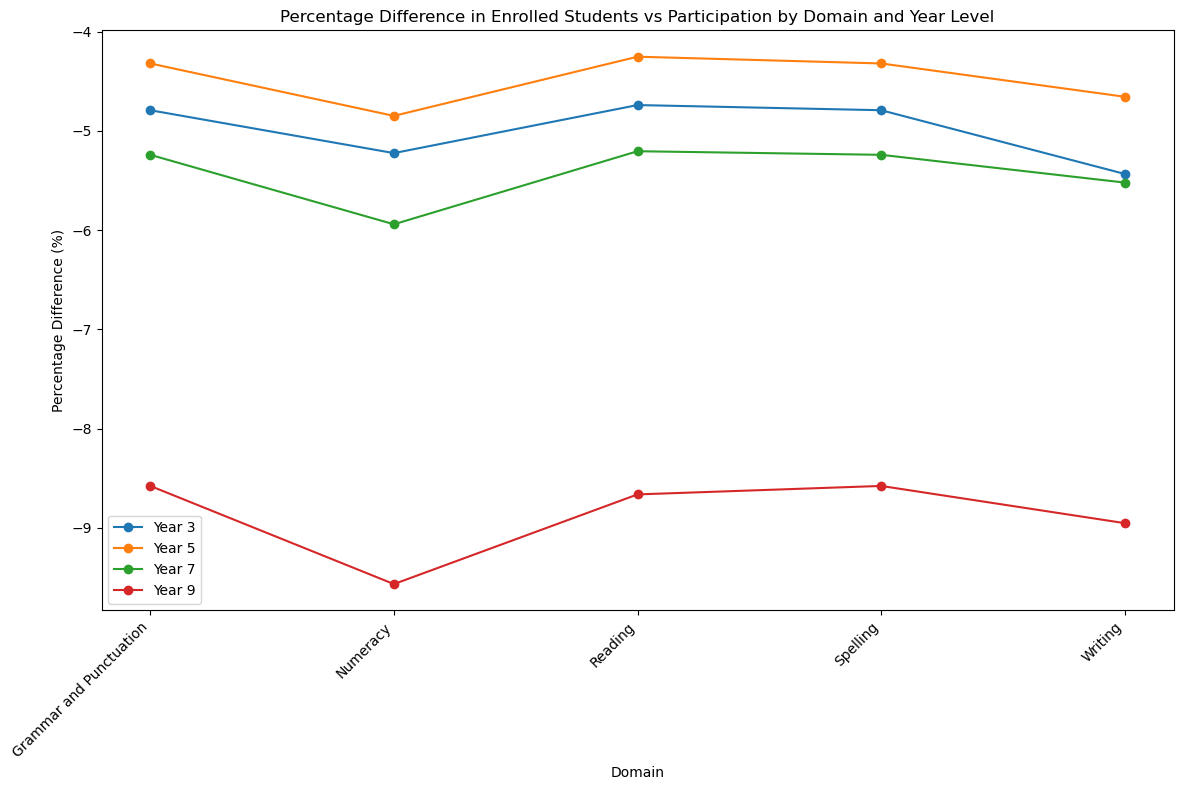

In [41]:
# Calculate percentage difference function
def calculate_percentage_difference(enrolled, participation):
    return ((participation - enrolled) / enrolled) * 100

# Calculate percentage difference for each domain and year level
percentage_diff_3 = calculate_percentage_difference(Group_Yr3_Dom, Group_Yr3_PartNum)
percentage_diff_5 = calculate_percentage_difference(Group_Yr5_Dom, Group_Yr5_PartNum)
percentage_diff_7 = calculate_percentage_difference(Group_Yr7_Dom, Group_Yr7_PartNum)
percentage_diff_9 = calculate_percentage_difference(Group_Yr9_Dom, Group_Yr9_PartNum)

# Create a DataFrame to store the percentage differences
percentage_difference_data = pd.DataFrame({
    "Domain": Group_Yr3_Dom.index,
    "Year 3": percentage_diff_3.values,
    "Year 5": percentage_diff_5.values,
    "Year 7": percentage_diff_7.values,
    "Year 9": percentage_diff_9.values
})

# Create a line graph
plt.figure(figsize=(12, 8))

# Plot lines for each year level
plt.plot(percentage_difference_data['Domain'], percentage_difference_data['Year 3'], marker='o', label='Year 3')
plt.plot(percentage_difference_data['Domain'], percentage_difference_data['Year 5'], marker='o', label='Year 5')
plt.plot(percentage_difference_data['Domain'], percentage_difference_data['Year 7'], marker='o', label='Year 7')
plt.plot(percentage_difference_data['Domain'], percentage_difference_data['Year 9'], marker='o', label='Year 9')

plt.xlabel('Domain')
plt.ylabel('Percentage Difference (%)')
plt.title('Percentage Difference in Enrolled Students vs Participation by Domain and Year Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the line graph
plt.show()


In [9]:
df_Naplan_copy = df_Naplan.copy()

DATA CLEANSE - FILTERED OUT BY STATE AND KEPT AUS DATA

In [10]:
# Loading data
df_Naplan_AUS = pd.read_csv("Naplan_results_AUS.csv")
df_Naplan_AUS.head(5)

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,PCTL05,PCTL20,PCTL80,PCTL95,TREND,TREND_VALUE,NOD_MEAN_PREV,NOD_NMS_PREV,NOD_MEAN_BASE,NOD_NMS_BASE
0,2008,3,Grammar and Punctuation,AUS,All,271720,403.2,1.3,87.5,91.7,...,257.4,331.2,476.9,539.0,Dome shaped,407.5,NaN,NaN,NaN,NaN
1,2008,3,Numeracy,AUS,All,271720,396.9,1.0,70.4,95.0,...,282.6,337.4,456.5,512.0,Flat,395.2,NaN,NaN,NaN,NaN
2,2008,3,Reading,AUS,All,271720,400.5,1.2,84.5,92.1,...,262.4,326.9,472.4,532.0,Increasing,407.1,NaN,NaN,NaN,NaN
3,2008,3,Spelling,AUS,All,271720,399.5,1.1,79.8,92.5,...,263.1,334.9,466.1,523.4,Increasing,402.2,NaN,NaN,NaN,NaN
4,2008,5,Grammar and Punctuation,AUS,All,271423,496.2,1.1,80.6,91.9,...,360.0,432.9,562.3,622.8,Flat,498.2,NaN,NaN,NaN,NaN


In [11]:
# student year grouped 'Calendar_Year' per year level
Group_Yr3_AUS = df_Naplan_AUS.loc[df_Naplan_AUS['YEAR_LEVEL'] == 3].groupby('CALENDAR_YEAR')
Group_Yr5_AUS = df_Naplan_AUS.loc[df_Naplan_AUS['YEAR_LEVEL'] == 5].groupby('CALENDAR_YEAR')
Group_Yr7_AUS = df_Naplan_AUS.loc[df_Naplan_AUS['YEAR_LEVEL'] == 7].groupby('CALENDAR_YEAR')
Group_Yr9_AUS = df_Naplan_AUS.loc[df_Naplan_AUS['YEAR_LEVEL'] == 9].groupby('CALENDAR_YEAR')

In [12]:
#Number of enrolled students each year
Number_Enrolled_yr3_AUS = Group_Yr3_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr5_AUS = Group_Yr5_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr7_AUS = Group_Yr7_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr9_AUS = Group_Yr9_AUS["ENROLLED_STUDENTS"].sum().astype(int)

In [13]:
# Number of enrolled students each year in a DF
Number_Enrolled_AUS = pd.DataFrame({
    "Year 3": Number_Enrolled_yr3_AUS,
    "Year 5": Number_Enrolled_yr5_AUS,
    "Year 7": Number_Enrolled_yr7_AUS,
    "Year 9": Number_Enrolled_yr9_AUS
})
Number_Enrolled_AUS

,Year 3,Year 5,Year 7,Year 9
CALENDAR_YEAR,,,,
2008,1086880,1085692,1103892,1123680
2009,1081112,1094440,1057352,1129376
2010,1006420,1105836,1102096,1119344
2011,1353600,1371960,1386105,1341955
2012,1388815,1278930,1401905,1395605
2013,1410170,1379120,1392700,1404865
2014,1479150,1412920,1296355,1420025
2015,1537745,1430770,1391715,1408010
2016,1573165,1496075,1426080,1312095


In [14]:
# Group the data by Domain and Year Level
Group_Yr3_Dom_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 3].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr5_Dom_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 5].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr7_Dom_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 7].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()
Group_Yr9_Dom_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 9].groupby('DOMAIN')['ENROLLED_STUDENTS'].sum()

# Create a DataFrame to store the number of enrolled students each year
Number_by_Domain_AUS = pd.DataFrame({
    "Year 3": Group_Yr3_Dom,
    "Year 5": Group_Yr5_Dom,
    "Year 7": Group_Yr7_Dom,
    "Year 9": Group_Yr9_Dom
}).reset_index()

# Display the DataFrame
print(Number_by_Domain_AUS)

                    DOMAIN      Year 3      Year 5      Year 7      Year 9
0  Grammar and Punctuation  56773185.0  56044747.0  55015506.0  54426096.0
1                 Numeracy  56772754.0  56044509.0  55015505.0  54425772.0
2                  Reading  56773546.0  56045109.0  55016055.0  54426375.0
3                 Spelling  56773185.0  56044747.0  55015468.0  54426096.0
4                  Writing  47338102.0  46272842.0  45315677.0  44424917.0


In [15]:
# Group the data by Paricipation numbers and Year Level
Group_Yr3_PartNum_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 3].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr5_PartNum_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 5].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr7_PartNum_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 7].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()
Group_Yr9_PartNum_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 9].groupby('DOMAIN')['PARTICIPATION_NUMBER'].sum()

# Create a DataFrame to store the number of enrolled students each year
Number_by_PartNum_AUS = pd.DataFrame({
    "Year 3": Group_Yr3_PartNum,
    "Year 5": Group_Yr5_PartNum,
    "Year 7": Group_Yr7_PartNum,
    "Year 9": Group_Yr9_PartNum
}).reset_index()

# Display the DataFrame
print(Number_by_PartNum_AUS)

                    DOMAIN    Year 3    Year 5    Year 7    Year 9
0  Grammar and Punctuation  54052430  53622927  52131890  49758249
1                 Numeracy  53806822  53326763  51746967  49219982
2                  Reading  54082321  53661376  52152347  49712096
3                 Spelling  54052430  53622927  52131856  49758249
4                  Writing  44765636  44118058  42813757  40448300


In [16]:
# Calculate percentage difference function
def calculate_percentage_difference(enrolled, participation):
    return ((participation - enrolled) / enrolled) * 100

# Calculate percentage difference for each domain and year level
percentage_diff_3_AUS = calculate_percentage_difference(Group_Yr3_Dom_AUS, Group_Yr3_PartNum_AUS)
percentage_diff_5_AUS = calculate_percentage_difference(Group_Yr5_Dom_AUS, Group_Yr5_PartNum_AUS)
percentage_diff_7_AUS = calculate_percentage_difference(Group_Yr7_Dom_AUS, Group_Yr7_PartNum_AUS)
percentage_diff_9_AUS = calculate_percentage_difference(Group_Yr9_Dom_AUS, Group_Yr9_PartNum_AUS)

# Create a DataFrame to store the percentage differences
percentage_difference_data_AUS = pd.DataFrame({
    "Domain": Group_Yr3_Dom.index,
    "Year 3": percentage_diff_3.values,
    "Year 5": percentage_diff_5.values,
    "Year 7": percentage_diff_7.values,
    "Year 9": percentage_diff_9.values
})

# Display the DataFrame
print(percentage_difference_data_AUS)

                    Domain    Year 3    Year 5    Year 7    Year 9
0  Grammar and Punctuation -4.792324 -4.321226 -5.241460 -8.576487
1                 Numeracy -5.224217 -4.849264 -5.941122 -9.564936
2                  Reading -4.740280 -4.253240 -5.205222 -8.661755
3                 Spelling -4.792324 -4.321226 -5.241457 -8.576487
4                  Writing -5.434240 -4.656693 -5.521092 -8.951321


In [24]:

# Group the data for df_Naplan by Calendar Year and Year Level
Group_Yr3 = df_Naplan[df_Naplan['YEAR_LEVEL'] == 3].groupby('CALENDAR_YEAR')
Group_Yr5 = df_Naplan[df_Naplan['YEAR_LEVEL'] == 5].groupby('CALENDAR_YEAR')
Group_Yr7 = df_Naplan[df_Naplan['YEAR_LEVEL'] == 7].groupby('CALENDAR_YEAR')
Group_Yr9 = df_Naplan[df_Naplan['YEAR_LEVEL'] == 9].groupby('CALENDAR_YEAR')

# Calculate the number of enrolled students for each year and year level
Number_Enrolled_yr3 = Group_Yr3["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr5 = Group_Yr5["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr7 = Group_Yr7["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr9 = Group_Yr9["ENROLLED_STUDENTS"].sum().astype(int)

# Group the data for df_Naplan_AUS by Calendar Year and Year Level
Group_Yr3_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 3].groupby('CALENDAR_YEAR')
Group_Yr5_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 5].groupby('CALENDAR_YEAR')
Group_Yr7_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 7].groupby('CALENDAR_YEAR')
Group_Yr9_AUS = df_Naplan_AUS[df_Naplan_AUS['YEAR_LEVEL'] == 9].groupby('CALENDAR_YEAR')

# Calculate the number of enrolled students for each year and year level for df_Naplan_AUS
Number_Enrolled_yr3_AUS = Group_Yr3_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr5_AUS = Group_Yr5_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr7_AUS = Group_Yr7_AUS["ENROLLED_STUDENTS"].sum().astype(int)
Number_Enrolled_yr9_AUS = Group_Yr9_AUS["ENROLLED_STUDENTS"].sum().astype(int)

# Calculate the percentage difference function
def calculate_percentage_difference(enrolled1, enrolled2):
    return ((enrolled2 - enrolled1) / enrolled1) * 100

# Calculate the percentage difference for each year and year level
percentage_diff_3 = calculate_percentage_difference(Number_Enrolled_yr3, Number_Enrolled_yr3_AUS)
percentage_diff_5 = calculate_percentage_difference(Number_Enrolled_yr5, Number_Enrolled_yr5_AUS)
percentage_diff_7 = calculate_percentage_difference(Number_Enrolled_yr7, Number_Enrolled_yr7_AUS)
percentage_diff_9 = calculate_percentage_difference(Number_Enrolled_yr9, Number_Enrolled_yr9_AUS)

# Create a DataFrame to store the percentage differences
percentage_difference_data = pd.DataFrame({
    "Year 3": percentage_diff_3.values,
    "Year 5": percentage_diff_5.values,
    "Year 7": percentage_diff_7.values,
    "Year 9": percentage_diff_9.values
}, index=Number_Enrolled_yr3.index)  # Use index from any year level data

# Display the DataFrame
print(percentage_difference_data)


                  Year 3     Year 5     Year 7     Year 9
CALENDAR_YEAR                                            
2008          -91.577556 -91.583710 -91.574409 -91.558003
2009          -91.587994 -91.586747 -91.586892 -91.552078
2010          -91.600220 -91.610633 -91.607569 -91.601067
2011          -91.605149 -91.608171 -91.599745 -91.607237
2012          -91.605838 -91.605603 -91.605123 -91.601989
2013          -91.595736 -91.600928 -91.595564 -91.594696
2014          -91.594769 -91.598024 -91.592483 -91.590569
2015          -91.581473 -91.583389 -91.580763 -91.579729
2016          -93.699158 -93.699624 -93.694542 -93.689996
2017          -93.693677 -93.696587 -93.691099 -93.687681
2018          -93.684615 -93.686932 -93.686343 -93.684159
2019          -93.685132 -93.679260 -93.676190 -93.676437
2021          -93.693485 -93.683466 -93.689329 -93.691911
2022          -93.674890 -93.673717 -93.669253 -93.677061


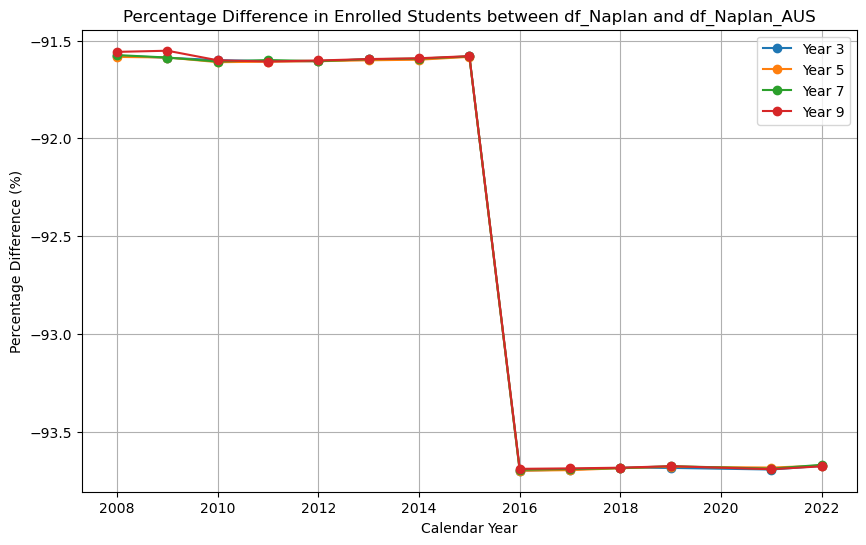

In [25]:
# Create a line graph
plt.figure(figsize=(10, 6))

# Plot the percentage differences for each year level
plt.plot(percentage_difference_data.index, percentage_difference_data['Year 3'], marker='o', label='Year 3')
plt.plot(percentage_difference_data.index, percentage_difference_data['Year 5'], marker='o', label='Year 5')
plt.plot(percentage_difference_data.index, percentage_difference_data['Year 7'], marker='o', label='Year 7')
plt.plot(percentage_difference_data.index, percentage_difference_data['Year 9'], marker='o', label='Year 9')

plt.xlabel('Calendar Year')
plt.ylabel('Percentage Difference (%)')
plt.title('Percentage Difference in Enrolled Students between df_Naplan and df_Naplan_AUS')
plt.legend()
plt.grid(True)

# Display the line graph
plt.show()

In [60]:
df_Naplan_AUS_copy = df_Naplan_AUS.copy()

COMPARISON BETWEEN USING PRE-CLEANED DATASET TO CLEANED DATASET - CLEANED DATA BY AUS

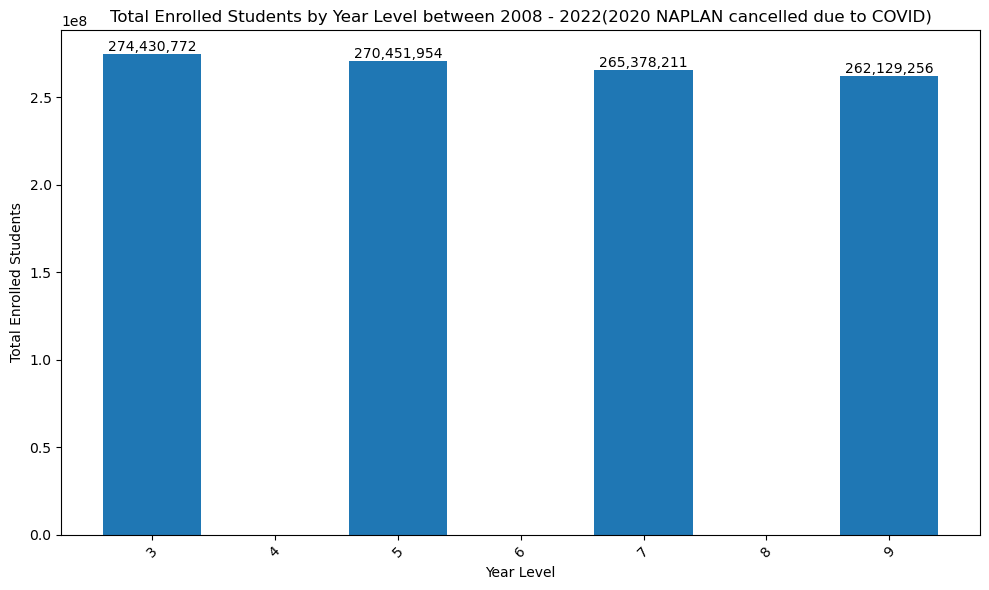

In [30]:
#UNCLEAN DATA


# Group by Year Level to find total enrolled students for each year level
enrolled_by_year_level = df_Naplan.groupby(['YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Plot a bar graph showing total enrolled students for each year level
plt.figure(figsize=(10, 6))
bars = plt.bar(enrolled_by_year_level['YEAR_LEVEL'], enrolled_by_year_level['ENROLLED_STUDENTS'])

# Add the total as an annotation above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10)

# Calculate the total enrollment
total_enrolled = enrolled_by_year_level['ENROLLED_STUDENTS'].sum()

plt.title('Total Enrolled Students by Year Level between 2008 - 2022(2020 NAPLAN cancelled due to COVID)')
plt.xlabel('Year Level')
plt.ylabel('Total Enrolled Students')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

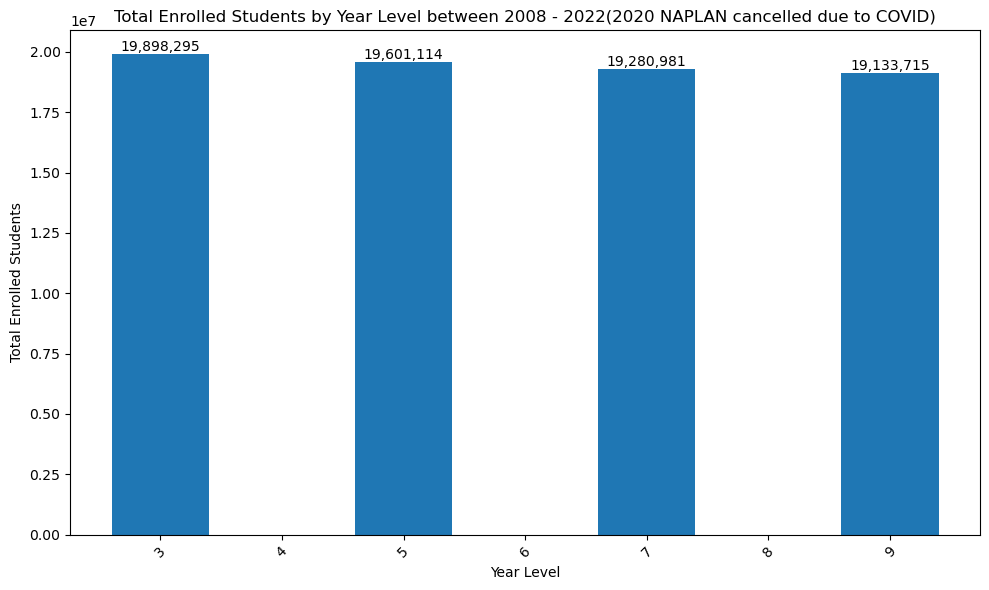

In [29]:
#CLEANED DATA


# Group by Year Level to find total enrolled students for each year level
enrolled_by_year_level_AUS = df_Naplan_AUS.groupby(['YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Plot a bar graph showing total enrolled students for each year level
plt.figure(figsize=(10, 6))
bars = plt.bar(enrolled_by_year_level_AUS['YEAR_LEVEL'], enrolled_by_year_level_AUS['ENROLLED_STUDENTS'])

# Add the total as an annotation above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10)

# Calculate the total enrollment
total_enrolled = enrolled_by_year_level_AUS['ENROLLED_STUDENTS'].sum()

plt.title('Total Enrolled Students by Year Level between 2008 - 2022(2020 NAPLAN cancelled due to COVID)')
plt.xlabel('Year Level')
plt.ylabel('Total Enrolled Students')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

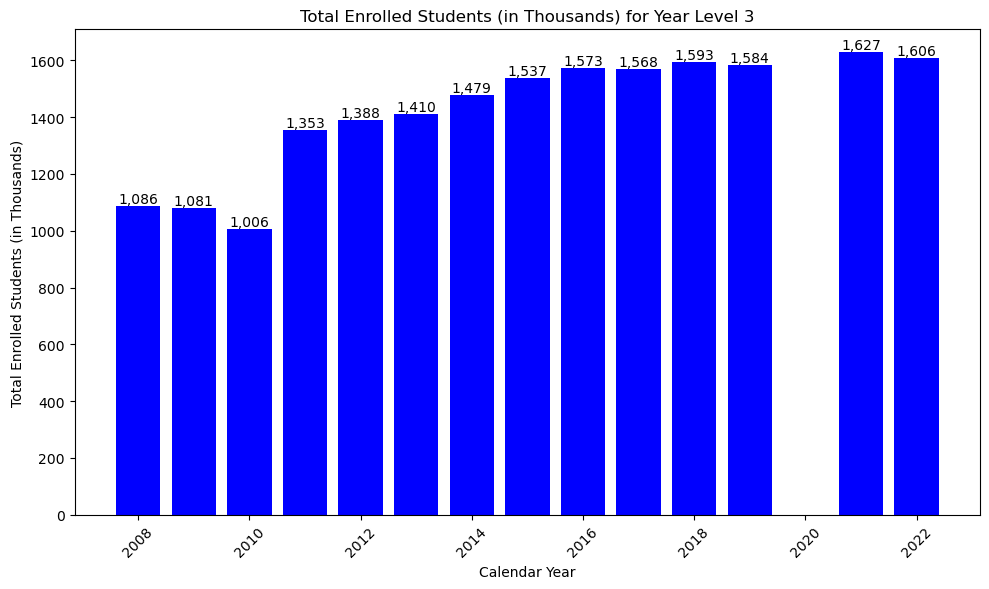

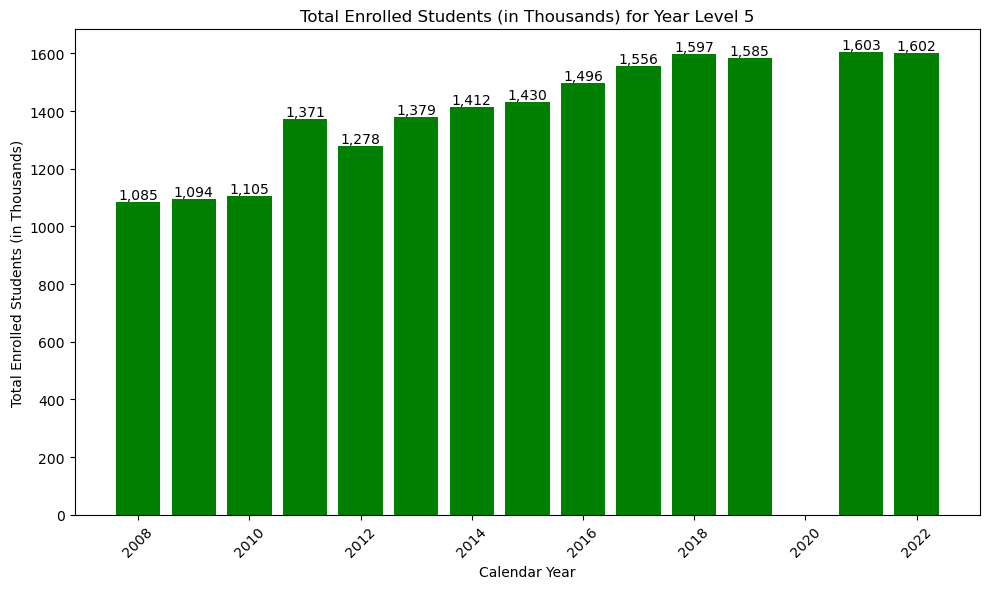

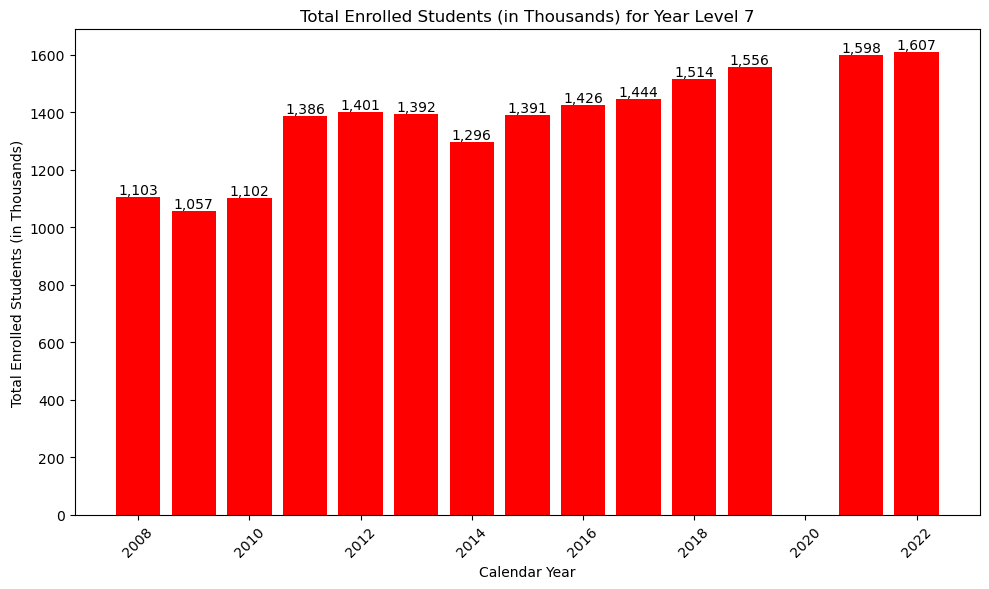

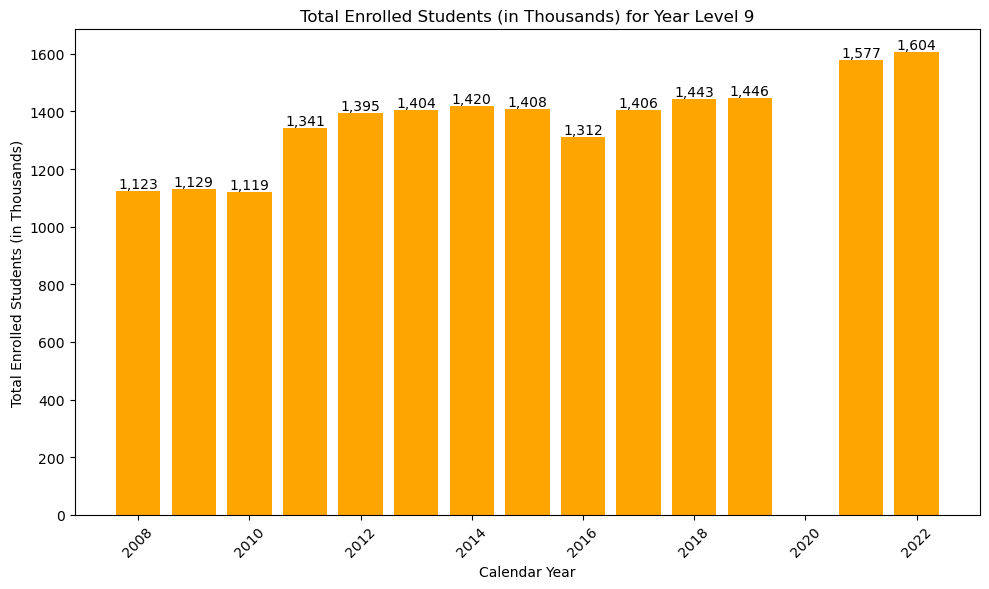

In [18]:
# Group by Calendar Year and Year Level to find total enrolled students
enrolled_by_year_level = df_Naplan_AUS.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Get unique year levels
unique_year_levels = enrolled_by_year_level['YEAR_LEVEL'].unique()

# Define colors for each year level
colors = ['blue', 'green', 'red', 'orange']

# Plot a separate bar graph for each year level
for i, year_level in enumerate(unique_year_levels):
    year_level_data = enrolled_by_year_level[enrolled_by_year_level['YEAR_LEVEL'] == year_level]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(year_level_data['CALENDAR_YEAR'], year_level_data['ENROLLED_STUDENTS'] / 1000, color=colors[i % len(colors)])  # Dividing by 1000
    
    # Annotate each bar with the total enrollment value (in thousands) at the top of the bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10)

    plt.title(f'Total Enrolled Students (in Thousands) for Year Level {year_level}')
    plt.xlabel('Calendar Year')
    plt.ylabel('Total Enrolled Students (in Thousands)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Comparison between Enrollement Numbers and Participation Numbers

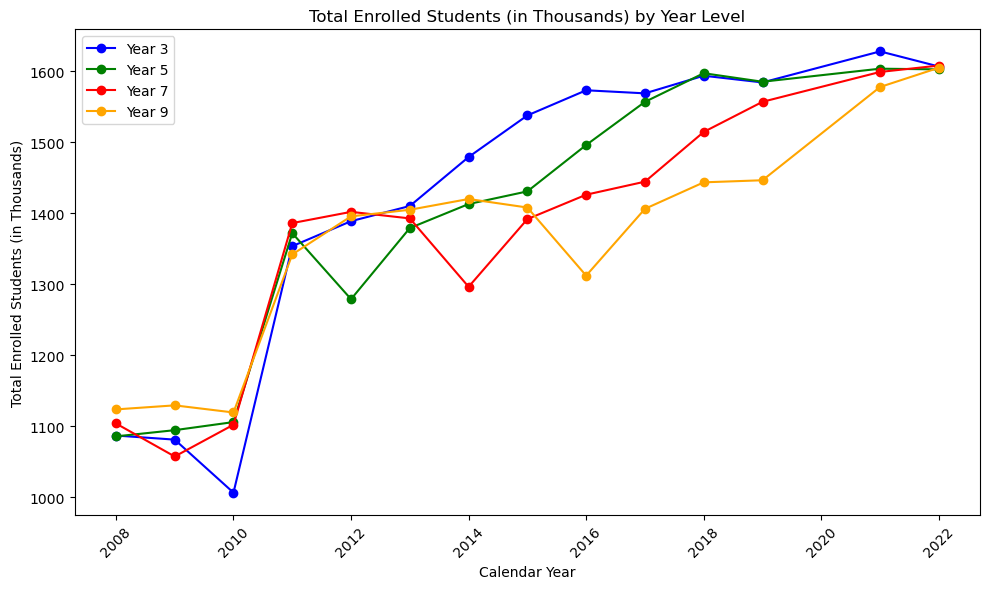

In [42]:
# Group by Calendar Year and Year Level to find total enrolled students
enrolled_by_year_level = df_Naplan_AUS.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Get unique year levels
unique_year_levels = enrolled_by_year_level['YEAR_LEVEL'].unique()

# Define colors for each year level
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))

# Plot a line for each year level
for i, year_level in enumerate(unique_year_levels):
    year_level_data = enrolled_by_year_level[enrolled_by_year_level['YEAR_LEVEL'] == year_level]
    
    plt.plot(year_level_data['CALENDAR_YEAR'], year_level_data['ENROLLED_STUDENTS'] / 1000, marker='o', color=colors[i % len(colors)], label=f'Year {year_level}')

plt.title('Total Enrolled Students (in Thousands) by Year Level')
plt.xlabel('Calendar Year')
plt.ylabel('Total Enrolled Students (in Thousands)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

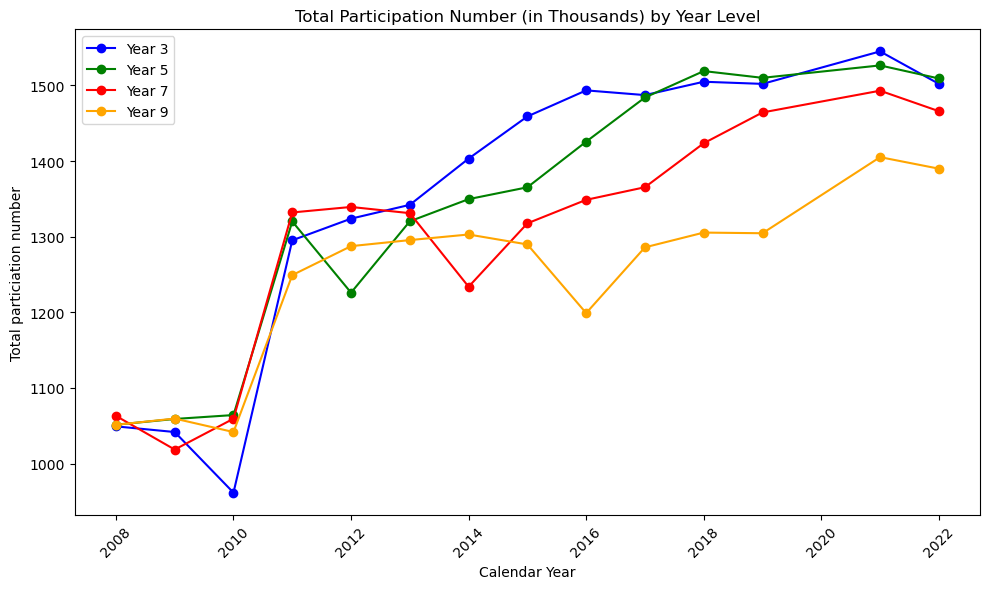

In [59]:
# Group by Calendar Year and Year Level to find total enrolled students
enrolled_by_year_level = df_Naplan_AUS.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL'])['PARTICIPATION_NUMBER'].sum().reset_index()

# Get unique year levels
unique_year_levels = enrolled_by_year_level['YEAR_LEVEL'].unique()

# Define colors for each year level
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))

# Plot a line for each year level
for i, year_level in enumerate(unique_year_levels):
    year_level_data = enrolled_by_year_level[enrolled_by_year_level['YEAR_LEVEL'] == year_level]
    
    plt.plot(year_level_data['CALENDAR_YEAR'], year_level_data['PARTICIPATION_NUMBER'] / 1000, marker='o', color=colors[i % len(colors)], label=f'Year {year_level}')

plt.title('Total Participation Number (in Thousands) by Year Level')
plt.xlabel('Calendar Year')
plt.ylabel('Total particiation number')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

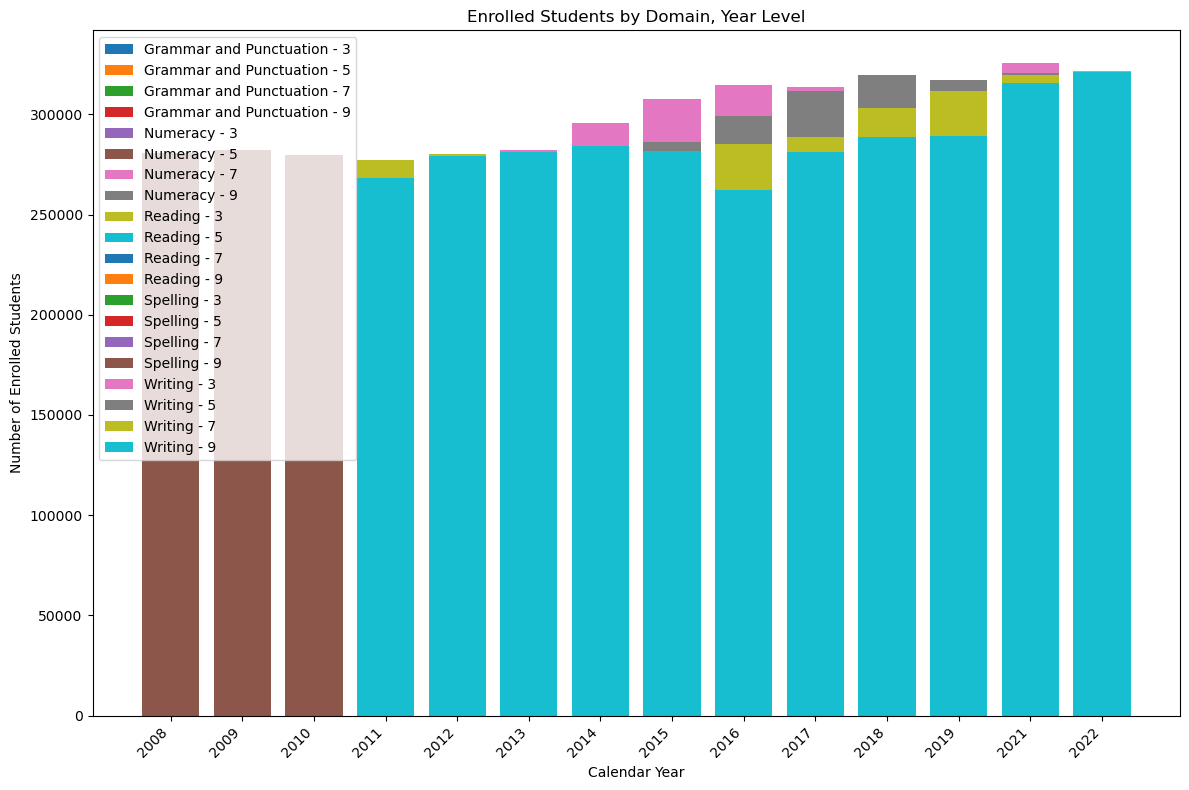

In [19]:
# Group the data
data3 = df_Naplan_AUS.groupby(['CALENDAR_YEAR', 'DOMAIN', 'YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Loop through each unique domain-year_level pair
for domain_year, group_data in data3.groupby(['DOMAIN', 'YEAR_LEVEL']):
    domain, year_level = domain_year
    plt.bar(group_data['CALENDAR_YEAR'].astype(str), group_data['ENROLLED_STUDENTS'], label=f'{domain} - {year_level}')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Domain, Year Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

C:\Users\killb\AppData\Local\Temp\ipykernel_23356\482492883.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group_data in data3.groupby(['YEAR_LEVEL']):


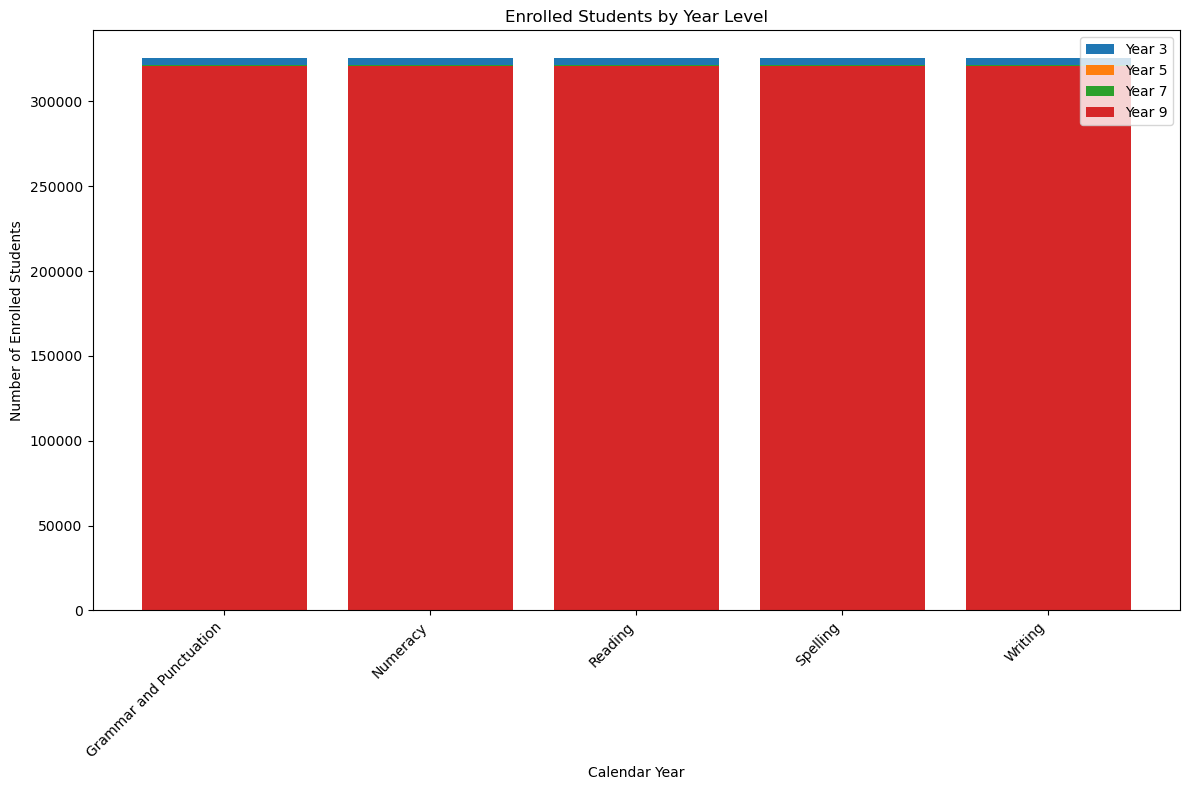

In [26]:
# Group the data by Year Level
data10 = df_Naplan_AUS.groupby(['YEAR_LEVEL', 'DOMAIN'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Loop through each unique year_level pair
for year, group_data in data3.groupby(['YEAR_LEVEL']):
    plt.bar(group_data['DOMAIN'].astype(str), group_data['ENROLLED_STUDENTS'], label=f'Year {year}')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Year Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

C:\Users\killb\AppData\Local\Temp\ipykernel_23356\3777008968.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group_data in data15.groupby(['YEAR_LEVEL']):


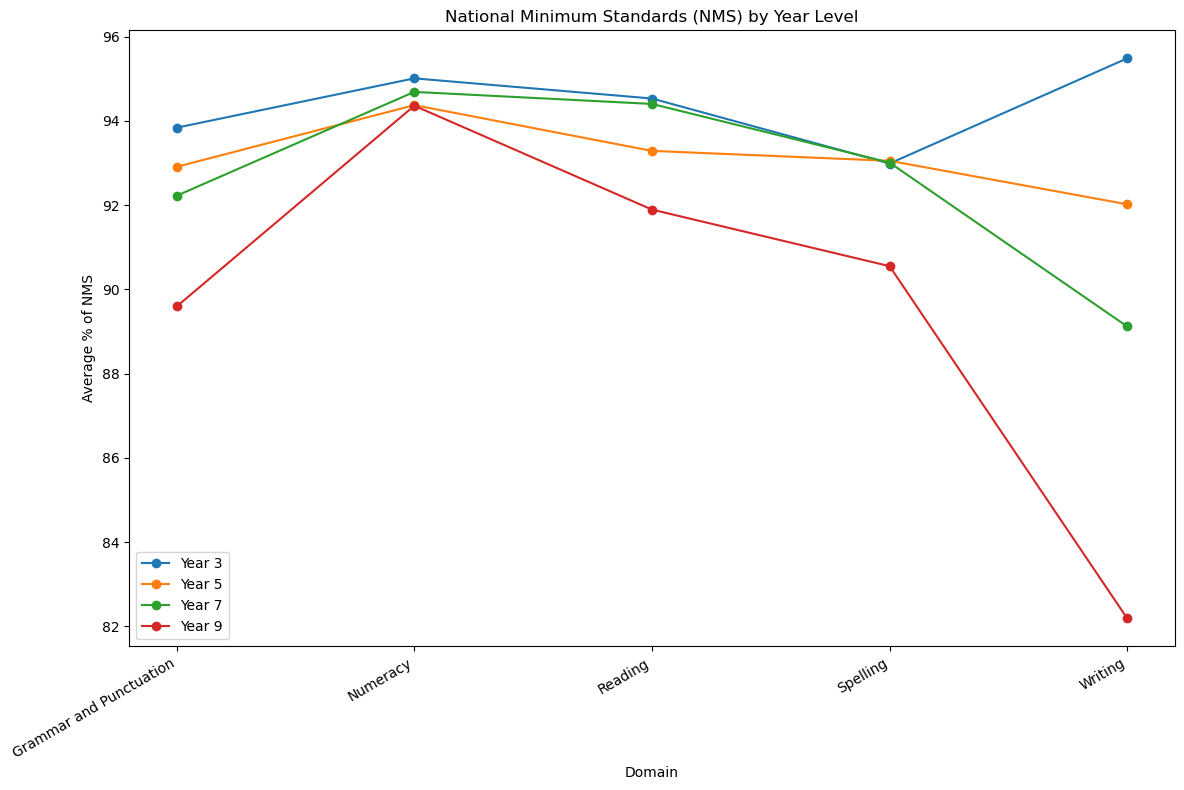

In [58]:
# Group the data by Year Level
data15 = df_Naplan_AUS.groupby(['YEAR_LEVEL', 'DOMAIN'])['NMS'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(12, 8))
#plt.figure(figsize=(10, 8))

# Loop through each unique year_level pair
for year, group_data in data15.groupby(['YEAR_LEVEL']):
    plt.plot(group_data['DOMAIN'].astype(str), group_data['NMS'], marker='o', label=f'Year {year}')

plt.xlabel('Domain')
plt.ylabel('Average % of NMS')
plt.title('National Minimum Standards (NMS) by Year Level')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.tight_layout()

# Display the line graph
plt.show()

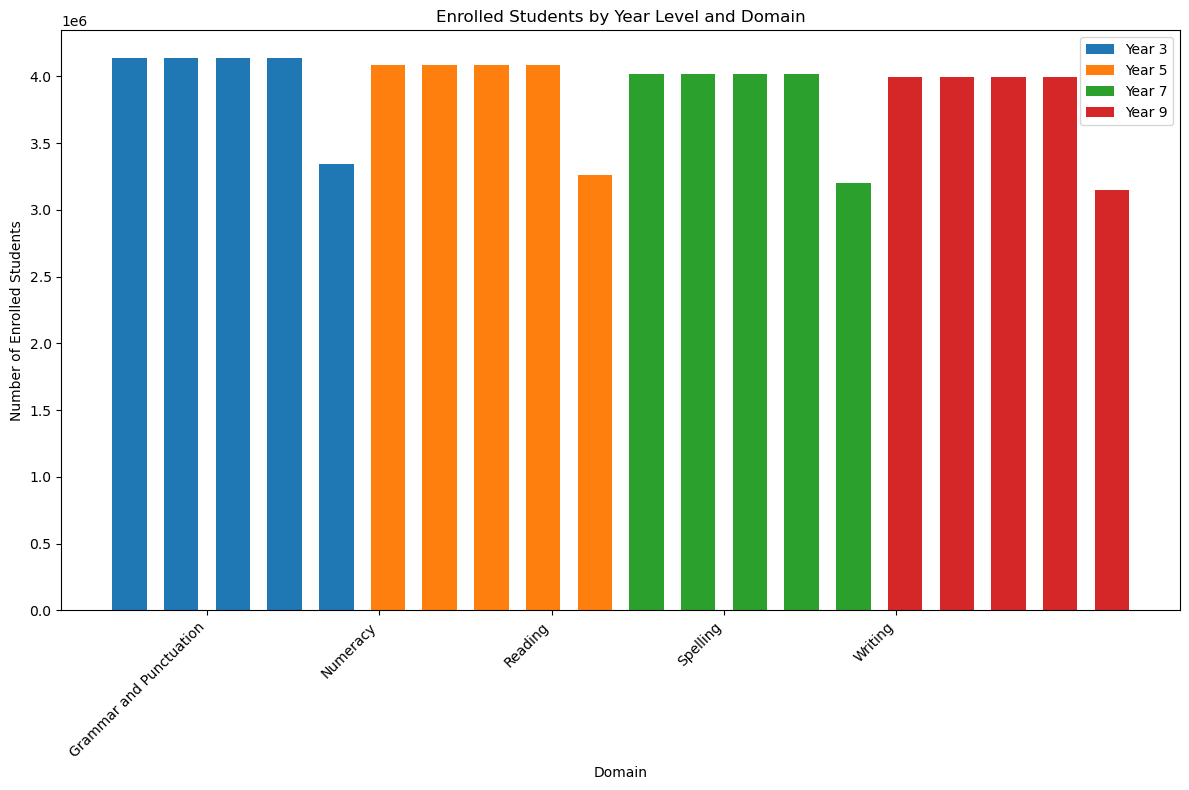

In [27]:
# Group the data by Year Level
data11 = df_Naplan_AUS.groupby(['YEAR_LEVEL', 'DOMAIN'])['ENROLLED_STUDENTS'].sum().reset_index()

# Get unique year levels
unique_years = data10['YEAR_LEVEL'].unique()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Calculate bar width and spacing
bar_width = 0.2
spacing = 0.1

# Loop through each unique year level
for idx, year in enumerate(unique_years):
    group_data = data10[data10['YEAR_LEVEL'] == year]
    x_positions = idx * (len(group_data['DOMAIN']) * (bar_width + spacing))
    
    plt.bar(x_positions + np.arange(len(group_data['DOMAIN'])) * (bar_width + spacing),
            group_data['ENROLLED_STUDENTS'], width=bar_width, label=f'Year {year}')

plt.xlabel('Domain')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Year Level and Domain')
plt.xticks(ticks=np.arange(len(group_data['DOMAIN'])) + (len(unique_years) - 1) * (bar_width + spacing) / 2,
           labels=group_data['DOMAIN'].astype(str), rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()


C:\Users\killb\AppData\Local\Temp\ipykernel_23356\1170027213.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group_data in data3.groupby(['YEAR_LEVEL']):


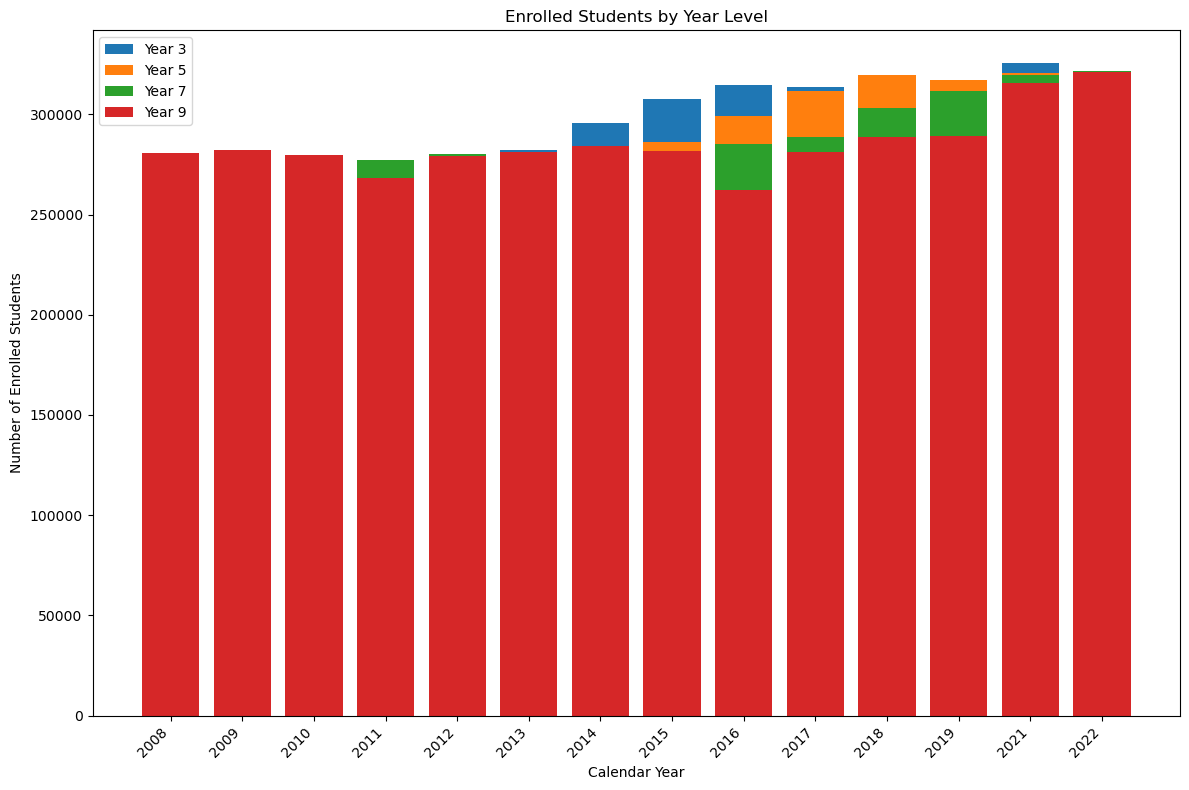

In [20]:
# Group the data by Year Level
data4 = df_Naplan_AUS.groupby(['YEAR_LEVEL', 'CALENDAR_YEAR'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Loop through each unique year_level pair
for year, group_data in data3.groupby(['YEAR_LEVEL']):
    plt.bar(group_data['CALENDAR_YEAR'].astype(str), group_data['ENROLLED_STUDENTS'], label=f'Year {year}')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Year Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

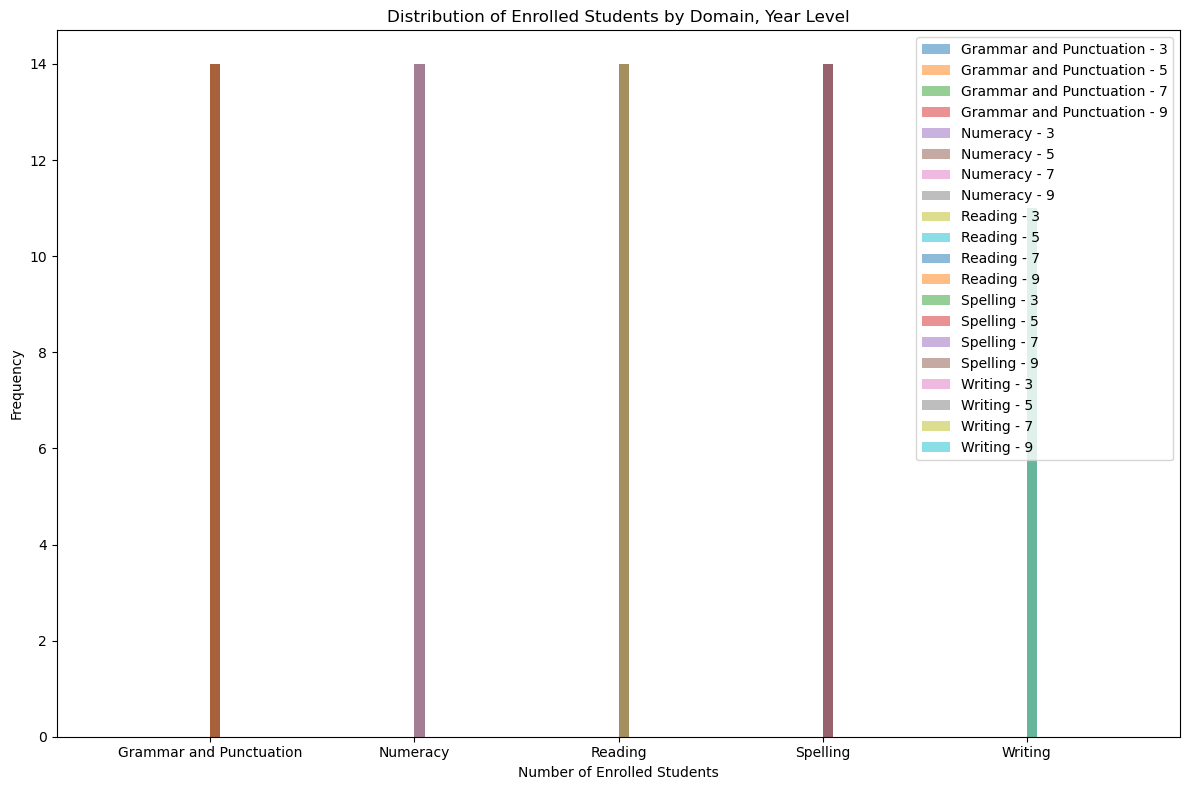

In [38]:
# Group the data
data6 = df_Naplan_AUS.groupby(['CALENDAR_YEAR', 'ENROLLED_STUDENTS','YEAR_LEVEL'])['DOMAIN'].sum().reset_index()

# Create a histogram for ENROLLED_STUDENTS
plt.figure(figsize=(12, 8))

# Loop through each unique domain-year_level pair
for domain_year, group_data in data3.groupby(['DOMAIN', 'YEAR_LEVEL']):
    domain, year_level = domain_year
    plt.hist(group_data['DOMAIN'], bins=20, alpha=0.5, label=f'{domain} - {year_level}')

plt.xlabel('Number of Enrolled Students')
plt.ylabel('Frequency')
plt.title('Distribution of Enrolled Students by Domain, Year Level')
plt.legend()
plt.tight_layout()

# Display the histogram
plt.show()

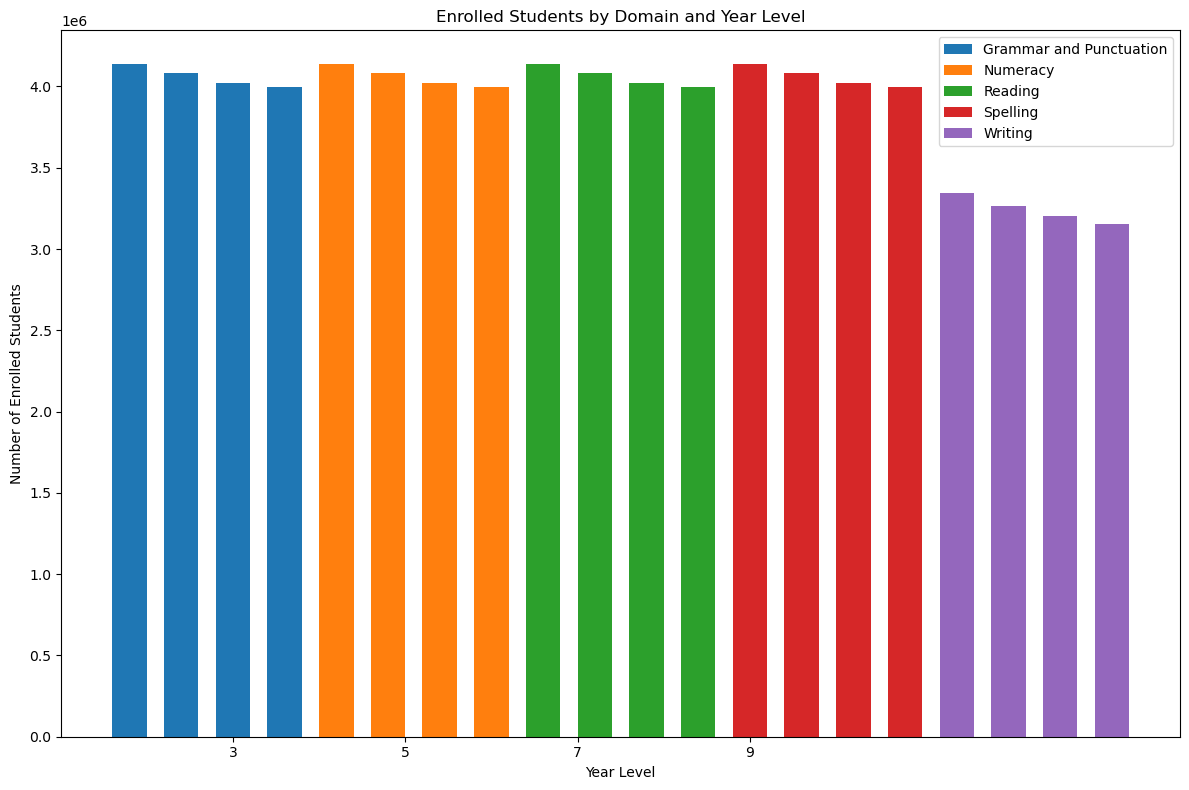

In [40]:
# Group the data by Domain and Year Level
data6 = df_Naplan_AUS.groupby(['DOMAIN', 'YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Get unique domains and year levels
unique_domains = data6['DOMAIN'].unique()
unique_years = data6['YEAR_LEVEL'].unique()

# Create a grouped bar chart
plt.figure(figsize=(12, 8))

# Calculate bar width and spacing
bar_width = 0.2
spacing = 0.1

# Loop through each unique domain
for idx, domain in enumerate(unique_domains):
    group_data = data6[data6['DOMAIN'] == domain]
    x_positions = idx * (len(group_data['YEAR_LEVEL']) * (bar_width + spacing))
    
    plt.bar(x_positions + np.arange(len(group_data['YEAR_LEVEL'])) * (bar_width + spacing),
            group_data['ENROLLED_STUDENTS'], width=bar_width, label=f'{domain}')

plt.xlabel('Year Level')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Domain and Year Level')
plt.xticks(ticks=np.arange(len(group_data['YEAR_LEVEL'])) + (len(unique_domains) - 1) * (bar_width + spacing) / 2,
           labels=group_data['YEAR_LEVEL'].astype(str))

# Display the grouped bar chart
plt.legend()
plt.tight_layout()
plt.show()
